Step 1: Import Libraries

In [12]:
import cv2
import numpy as np
from mtcnn import MTCNN
import torch
import pymesh
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image


Step 2: Face Alignment and Cropping

In [13]:
def align_and_crop_face(image):
    # Initialize MTCNN detector
    detector = MTCNN()
    
    # Detect faces in the image
    faces = detector.detect_faces(image)
    
    if len(faces) == 0:
        # No face detected
        return None, None
    
    # Assume only one face in the image
    face = faces[0]
    x, y, w, h = face['box']
    
    # Get the aligned face
    aligned_face = image[y:y+h, x:x+w]
    
    # Crop out the aligned face region
    # You can adjust the cropping area based on your specific requirements
    padding = 20  # Example padding
    cropped_face = aligned_face[padding:-padding, padding:-padding]  # Crop from all sides
    
    return aligned_face, cropped_face

Check align_and_crop_face() function

2024-02-20 06:10:53.443049: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-20 06:10:53.443073: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-20 06:10:53.443076: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-20 06:10:53.443107: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-20 06:10:53.443329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


2024-02-20 06:10:54.117745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


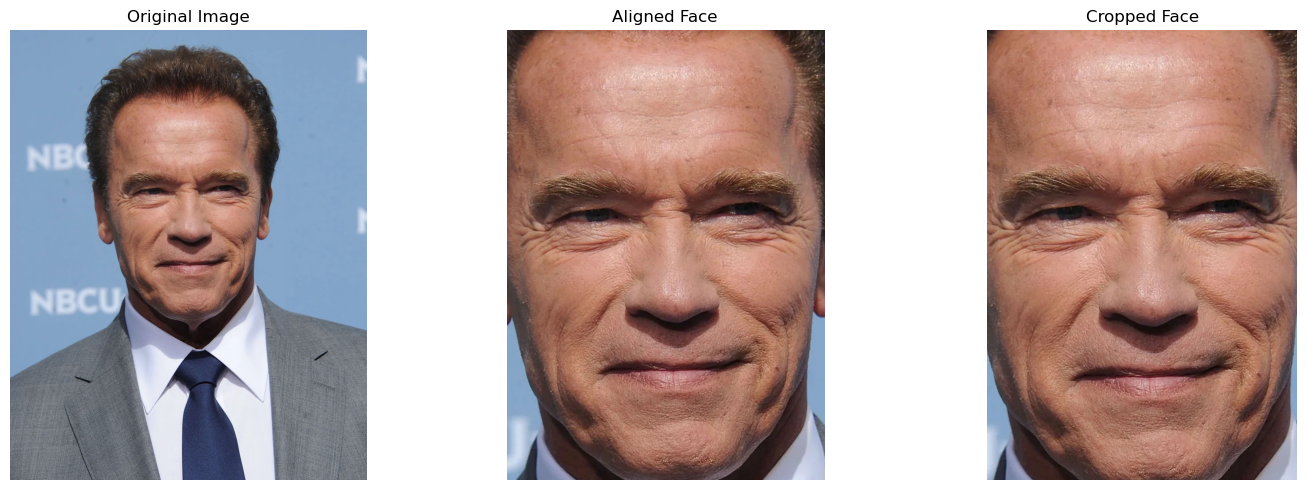

Aligned face saved at: images/aligned_face/aligned_face.jpg
Cropped face saved at: images/cropped_face/cropped_face.jpg


In [15]:
import os
import matplotlib.pyplot as plt

# Load the input image
image_path = "images/img1.jpg"
image = plt.imread(image_path)

# Step 1: Face Alignment and Cropping
aligned_face, cropped_face = align_and_crop_face(image)

# Display the original image, aligned face, and cropped face
if aligned_face is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(aligned_face)
    axes[1].set_title("Aligned Face")
    axes[1].axis('off')
    
    axes[2].imshow(cropped_face)
    axes[2].set_title("Cropped Face")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Create directories if they don't exist
    aligned_face_dir = "images/aligned_face"
    cropped_face_dir = "images/cropped_face"
    os.makedirs(aligned_face_dir, exist_ok=True)
    os.makedirs(cropped_face_dir, exist_ok=True)
    
    # Save aligned and cropped faces
    aligned_face_path = os.path.join(aligned_face_dir, "aligned_face.jpg")
    cropped_face_path = os.path.join(cropped_face_dir, "cropped_face.jpg")
    
    plt.imsave(aligned_face_path, aligned_face)
    plt.imsave(cropped_face_path, cropped_face)
    
    print("Aligned face saved at:", aligned_face_path)
    print("Cropped face saved at:", cropped_face_path)
    
else:
    print("No face detected in the image.")


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


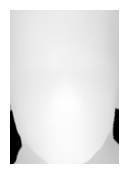

In [20]:
import numpy as np
from transformers import DPTImageProcessor, DPTForDepthEstimation
import torch
from PIL import Image

# Load the image
image_path = "images/aligned_face/aligned_face.jpg"  # replace with your image path
image = Image.open(image_path)

# Load the DPT-Large model
processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

# Prepare the image for the model
inputs = processor(images=image, return_tensors="pt")

# Estimate the depth map
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# Interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# Visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
image_np = np.array(image)
rgb = image_np
# Now you have 'depth' as your depth map and 'image' as the corresponding RGB image



import matplotlib.pyplot as plt

# Plot the depth map
plt.figure(figsize=(2,2))
plt.imshow(depth, cmap='gray')
plt.axis('off')




plt.show()




In [22]:
import numpy as np
import open3d as o3d

# Assuming 'depth' is your depth map and 'rgb' is your corresponding RGB image
depth = np.array(depth)
rgb = np.array(image_np)

# Create point cloud from depth map
fx, fy = 525.0, 525.0  # Focal lengths
cx, cy = 319.5, 239.5  # Optical center
depth_scale = 1000.0  # Depth scale
width, height = depth.shape[1], depth.shape[0]

# Create camera intrinsic matrix
intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)

# Create RGBD image
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    o3d.geometry.Image(rgb),
    o3d.geometry.Image(depth),
    depth_scale=depth_scale,
    depth_trunc=1000.0,
    convert_rgb_to_intensity=False
)

# Create point cloud from RGBD image
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    intrinsic
)

# Save point cloud as .ply file
o3d.io.write_point_cloud("3d_head.ply", pcd)


True

/Users/li/anaconda3/envs/tf/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/li/anaconda3/envs/tf/lib/python3.9/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


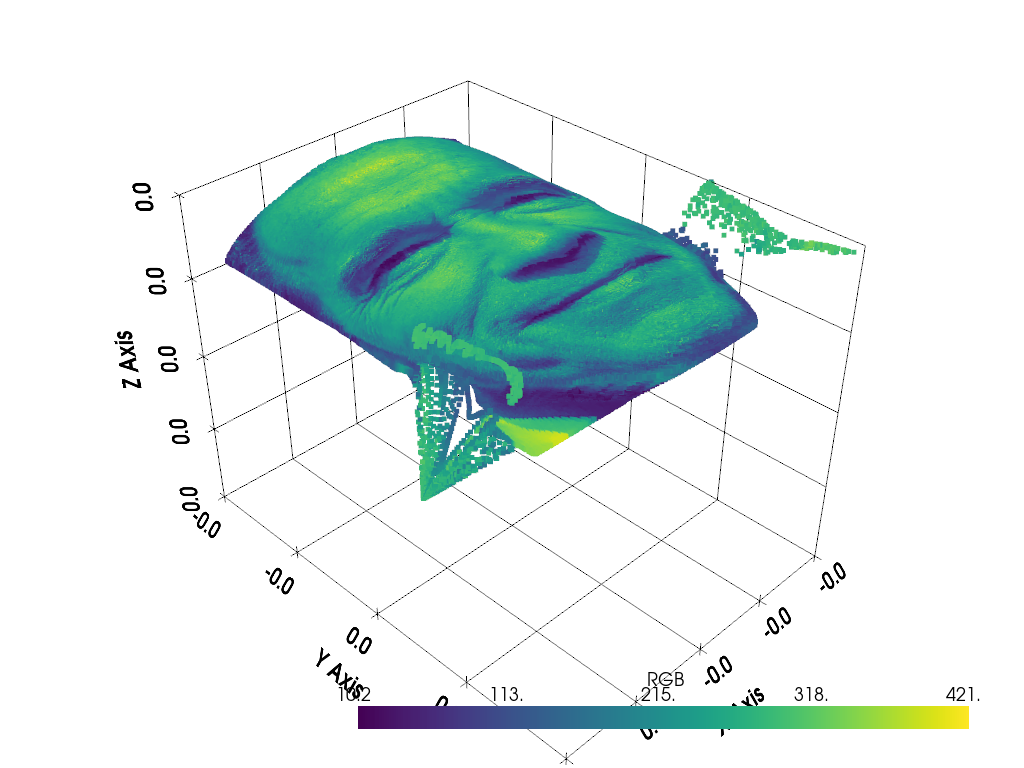

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


------------------------------------------------------------------------------------------------
/*!

In [1]:
!pip install datasets

In [2]:
!pip install --upgrade jupyter ipywidgets
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


Import the Biwi Kinect Head Pose dataset and other necessary libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from data import biwi_kinect_head_pose

In [4]:
dataset = biwi_kinect_head_pose.BiwiKinectHeadPose()

In [4]:
dataset = biwi_kinect_head_pose.BiwiKinectHeadPose()
dataset.download_and_prepare()

Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
# Access dataset info
dataset_info = dataset.info
print(dataset_info)

DatasetInfo(description='The Biwi Kinect Head Pose Database is acquired with the Microsoft Kinect sensor, a structured IR light device.It contains 15K images of 20 people with 6 females and 14 males where 4 people were recorded twice.\n', citation='@article{fanelli_IJCV,\n  author = {Fanelli, Gabriele and Dantone, Matthias and Gall, Juergen and Fossati, Andrea and Van Gool, Luc},\n  title = {Random Forests for Real Time 3D Face Analysis},\n  journal = {Int. J. Comput. Vision},\n  year = {2013},\n  month = {February},\n  volume = {101},\n  number = {3},\n  pages = {437--458}\n}\n', homepage='https://icu.ee.ethz.ch/research/datsets.html', license='This database is made available for non-commercial use such as university research and education.', features={'sequence_number': Value(dtype='string', id=None), 'subject_id': Value(dtype='string', id=None), 'rgb': Sequence(feature=Image(decode=True, id=None), length=-1, id=None), 'rgb_cal': {'intrisic_mat': Array2D(shape=(3, 3), dtype='float64'

Find the attribute of dataset

In [6]:
print(dir(dataset))


['BUILDER_CONFIGS', 'BUILDER_CONFIG_CLASS', 'DEFAULT_CONFIG_NAME', 'DEFAULT_WRITER_BATCH_SIZE', 'VERSION', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_dataset', '_as_streaming_dataset_single', '_build_cache_dir', '_build_single_dataset', '_cache_dir', '_cache_dir_root', '_cache_downloaded_dir', '_check_legacy_cache', '_check_legacy_cache2', '_check_manual_download', '_create_builder_config', '_download_and_prepare', '_download_post_processing_resources', '_download_prepared_from_hf_gcs', '_file_format', '_fs', '_generate_examples', '_get_calibration_information', '_get_dataset_fingerprint', '_get_examples_iterable_for_split', '_get_head_pose_information',

Define preprocessing functions

In [9]:
import numpy as np

def preprocess_image(image):
    # Convert PIL image to NumPy array
    image = np.array(image)
    # Convert NumPy array to TensorFlow tensor
    image = tf.convert_to_tensor(image)
    # Resize the image to the desired input shape (e.g., 224x224)
    image = tf.image.resize(image, [224, 224])
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image



def preprocess_data(sample):
    # Preprocess the RGB image
    sample['rgb'] = preprocess_image(sample['rgb'])
    # Convert the ground truth head pose to TensorFlow tensors if needed
    sample['head_pose_gt']['center'] = tf.convert_to_tensor(sample['head_pose_gt']['center'], dtype=tf.float32)
    # Convert the rotation matrix to a NumPy array, flatten it, and then convert it to a tensor
    rotation_np = np.array(sample['head_pose_gt']['rotation'])
    sample['head_pose_gt']['rotation'] = tf.convert_to_tensor(rotation_np.flatten(), dtype=tf.float32)
    return sample


Apply preprocessing to the dataset

In [10]:
preprocessed_dataset = dataset.as_dataset(split='train').map(preprocess_data)


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

: 

In [1]:
print("H")

H
